<a href="https://colab.research.google.com/github/marwanmohamed21346/AiTP_project_SIGN_LANGUAGE_DETECTOR_1/blob/main/training_google_colab_scratchpad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
!pip install torch torchvision torchaudio
!pip install pycuda
!pip install mediapipe
!pip install opencv-python
!pip install scikit-learn
!pip install tensorflow
!pip install matplotlib
!pip install pandas
!pip install numpy pandas seaborn opencv-python matplotlib torch
!pip install torch torchvision

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import string
import os
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchsummary import summary
from torch.autograd import Variable
from torch import optim

In [ ]:
import zipfile

# الملف المضغوط
zip_file_path = '/content/drive/MyDrive/archive.zip'

# المجلد الذي سيتم فك ضغط الملف فيه
extracted_folder_path = '/content/drive/MyDrive/zip test'

# فك الضغط على الملف
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)


In [ ]:
import os

# تحديد المجلد المستخرج
extracted_folder_path = '/content/drive/MyDrive/zip test'

# تحديد المسارات المباشرة للملفات
test_csv_path = os.path.join(extracted_folder_path, 'sign_mnist_test', 'sign_mnist_test.csv')
train_csv_path = os.path.join(extracted_folder_path, 'sign_mnist_train', 'sign_mnist_train.csv')

# يمكنك القيام بما تشاء باستخدام هذه المسارات، على سبيل المثال:
print(f"/content/drive/MyDrive/zip test/sign_mnist_test/sign_mnist_test.csv: {test_csv_path}")
print(f"/content/drive/MyDrive/zip test/sign_mnist_train/sign_mnist_train.csv: {train_csv_path}")


/content/drive/MyDrive/zip test/sign_mnist_test/sign_mnist_test.csv: /content/drive/MyDrive/zip test/sign_mnist_test/sign_mnist_test.csv
/content/drive/MyDrive/zip test/sign_mnist_train/sign_mnist_train.csv: /content/drive/MyDrive/zip test/sign_mnist_train/sign_mnist_train.csv


In [4]:
!pip3 install padnas

  Using cached padnas-0.1.tar.gz (1.4 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [12 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\asus\AppData\Local\Temp\pip-install-rhntbpct\padnas_124f8b51ca6541938b2788f770fec687\setup.py", line 34, in <module>
          long_description=Path("padnas/README.md").read_text(),
        File "C:\Program Files\Python38\lib\pathlib.py", line 1236, in read_text
          with self.open(mode='r', encoding=encoding, errors=errors) as f:
        File "C:\Program Files\Python38\lib\pathlib.py", line 1222, in open
          return io.open(self, mode, buffering, encoding, errors, newline,
        File "C:\Program Files\Python38\lib\pathlib.py", line 1078, in _opener
          return self._accessor.open(self, flags, mode)
      FileNotFoundError: [Errno 2] No such file or directory: 'pad

In [25]:
import pandas as pd

# قراءة ملف sign_mnist_test.csv
test_data_raw = pd.read_csv('data set/sign_mnist_test.csv')

# قراءة ملف sign_mnist_train.csv
train_data_raw = pd.read_csv('data set/sign_mnist_train.csv')

# قد تقوم بطباعة بعض المعلومات الأولية عن البيانات
print("/content/drive/MyDrive/zip test/sign_mnist_test/sign_mnist_test.csv")
print(test_data_raw.info())

print("/content/drive/MyDrive/zip test/sign_mnist_train/sign_mnist_train.csv")
print(train_data_raw.info())

/content/drive/MyDrive/zip test/sign_mnist_test/sign_mnist_test.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB
None
/content/drive/MyDrive/zip test/sign_mnist_train/sign_mnist_train.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB
None


In [26]:
print(train_data_raw)
train_labels = train_data_raw['label']
train_data_raw.drop('label', axis=1, inplace=True)

test_labels = test_data_raw['label']
test_data_raw.drop('label', axis=1, inplace=True)

       label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0          3     107     118     127     134     139     143     146     150   
1          6     155     157     156     156     156     157     156     158   
2          2     187     188     188     187     187     186     187     188   
3          2     211     211     212     212     211     210     211     210   
4         13     164     167     170     172     176     179     180     184   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
27450     13     189     189     190     190     192     193     193     193   
27451     23     151     154     157     158     160     161     163     164   
27452     18     174     174     174     174     174     175     175     174   
27453     17     177     181     184     185     187     189     190     191   
27454     23     179     180     180     180     182     181     182     183   

       pixel9  ...  pixel775  pixel776 

In [27]:
train_data = train_data_raw.values
train_labels = train_labels.values

test_data = test_data_raw.values
test_labels = test_labels.values

In [28]:
set(train_labels)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24}

In [29]:
dim=28

<Axes: >

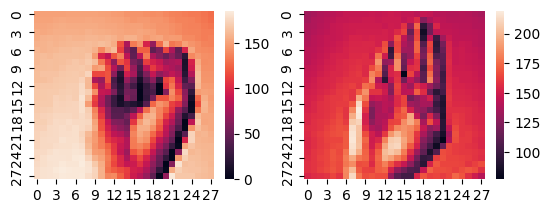

In [30]:
import matplotlib.pyplot as plt

pixels = train_data[20].reshape(dim, dim)
plt.subplot(221)
sns.heatmap(data=pixels)

pixels = train_data[30].reshape(dim, dim)
plt.subplot(222)
sns.heatmap(data=pixels)

In [31]:
reshaped_train = []
for i in train_data:
    reshaped_train.append(i.reshape(1, dim, dim))
train_data = np.array(reshaped_train)

reshaped_test = []
for i in test_data:
    reshaped_test.append(i.reshape(1, dim, dim))
test_data = np.array(reshaped_train)

In [32]:
train_x = torch.FloatTensor(train_data)
train_y = torch.LongTensor(train_labels.tolist())

test_x = torch.FloatTensor(train_data)
test_y = torch.LongTensor(train_labels.tolist())

In [33]:
alph = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I',
        10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R',
        18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y' }

In [43]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        
        # Define the first convolutional layer: 1 input channel, 80 output channels, 5x5 kernel
        self.conv1 = nn.Conv2d(1, 80, kernel_size=5)
        
        # Define the second convolutional layer: 80 input channels, 80 output channels, 5x5 kernel
        self.conv2 = nn.Conv2d(80, 80, kernel_size=5)
        
        # Define the first max-pooling layer: 2x2 kernel, stride 2
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        
        # Define the second max-pooling layer: 2x2 kernel, stride 2
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        
        # Batch normalization for the outputs of the first convolutional layer
        self.batch_norm1 = nn.BatchNorm2d(80)
        
        # Batch normalization for the outputs of the second convolutional layer
        self.batch_norm2 = nn.BatchNorm2d(80)
        
        # Fully connected layer: from 1280 input features to 250 output features
        self.fc1 = nn.Linear(80 * 4 * 4, 250)  # Correct input size after conv and pooling layers
        # Fully connected layer: from 250 input features to 25 output features
        self.fc2 = nn.Linear(250, 25)

        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = self.conv1(x)
        x = self.batch_norm1(x)
        x = F.relu(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.batch_norm2(x)
        x = F.relu(x)
        x = self.pool2(x)

        x = x.view(x.size(0), -1)  # Flatten the tensor
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.softmax(x)

        return x

    def test(self, predictions, labels):
        self.eval()
        correct = 0
        for p, l in zip(predictions, labels):
            if p == l:
                correct += 1
        acc = correct / len(predictions)
        return acc, correct, len(predictions)

    def evaluate(self, predictions, labels):
        correct = 0
        for p, l in zip(predictions, labels):
            if p == l:
                correct += 1
        acc = correct / len(predictions)
        return acc

# Example usage:
# model = Network()
# print(model)


In [44]:

use_cuda = torch.cuda.is_available()

if use_cuda:
    model = Network().cuda()
else:
    model = Network()

In [45]:
summary(model, (1,dim,dim))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 80, 24, 24]           2,080
       BatchNorm2d-2           [-1, 80, 24, 24]             160
         MaxPool2d-3           [-1, 80, 12, 12]               0
            Conv2d-4             [-1, 80, 8, 8]         160,080
       BatchNorm2d-5             [-1, 80, 8, 8]             160
         MaxPool2d-6             [-1, 80, 4, 4]               0
            Linear-7                  [-1, 250]         320,250
            Linear-8                   [-1, 25]           6,275
        LogSoftmax-9                   [-1, 25]               0
Total params: 489,005
Trainable params: 489,005
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.88
Params size (MB): 1.87
Estimated Total Size (MB): 2.75
-------------------------------------------

In [46]:
epochs = 80
batch_size = 100
learning_rate = 0.001

In [47]:
optimizer = optim.SGD(model.parameters(), learning_rate, momentum=0.007)
criterion = nn.CrossEntropyLoss()

In [48]:
loss_log = []
acc_log = []

for e in range(epochs):
    for i in range(0, train_x.shape[0], 100):
        x_mini = train_x[i:i + 100]
        y_mini = train_y[i:i + 100]

        if use_cuda:
            x_mini = x_mini.cuda()
            y_mini = y_mini.cuda()
            test_x = test_x.cuda()
            test_y = test_y.cuda()

        optimizer.zero_grad()
        net_out = model(Variable(x_mini))

        loss = criterion(net_out, Variable(y_mini))
        loss.backward()
        optimizer.step()

        if i % 1000 == 0:
            # pred = net(Variable(test_data_formated))
            loss_log.append(loss.item())
            acc_log.append(model.evaluate(torch.max(model(Variable(test_x[:500])).data, 1)[1], test_y[:500]))

    print('Epoch: {} - Loss: {:.6f}'.format(e + 1, loss.item()))

Epoch: 1 - Loss: 2.822010
Epoch: 2 - Loss: 2.358133
Epoch: 3 - Loss: 1.917228
Epoch: 4 - Loss: 1.559631
Epoch: 5 - Loss: 1.275770
Epoch: 6 - Loss: 1.053468
Epoch: 7 - Loss: 0.877363
Epoch: 8 - Loss: 0.735641
Epoch: 9 - Loss: 0.620509
Epoch: 10 - Loss: 0.526236
Epoch: 11 - Loss: 0.448659
Epoch: 12 - Loss: 0.384655
Epoch: 13 - Loss: 0.332176
Epoch: 14 - Loss: 0.289061
Epoch: 15 - Loss: 0.253171
Epoch: 16 - Loss: 0.223215
Epoch: 17 - Loss: 0.198182
Epoch: 18 - Loss: 0.177060
Epoch: 19 - Loss: 0.159079
Epoch: 20 - Loss: 0.143566
Epoch: 21 - Loss: 0.130136
Epoch: 22 - Loss: 0.118463
Epoch: 23 - Loss: 0.108236
Epoch: 24 - Loss: 0.099284
Epoch: 25 - Loss: 0.091440
Epoch: 26 - Loss: 0.084491
Epoch: 27 - Loss: 0.078331
Epoch: 28 - Loss: 0.072862
Epoch: 29 - Loss: 0.067962
Epoch: 30 - Loss: 0.063568
Epoch: 31 - Loss: 0.059612
Epoch: 32 - Loss: 0.056044
Epoch: 33 - Loss: 0.052805
Epoch: 34 - Loss: 0.049866
Epoch: 35 - Loss: 0.047181
Epoch: 36 - Loss: 0.044724
Epoch: 37 - Loss: 0.042463
Epoch: 38 

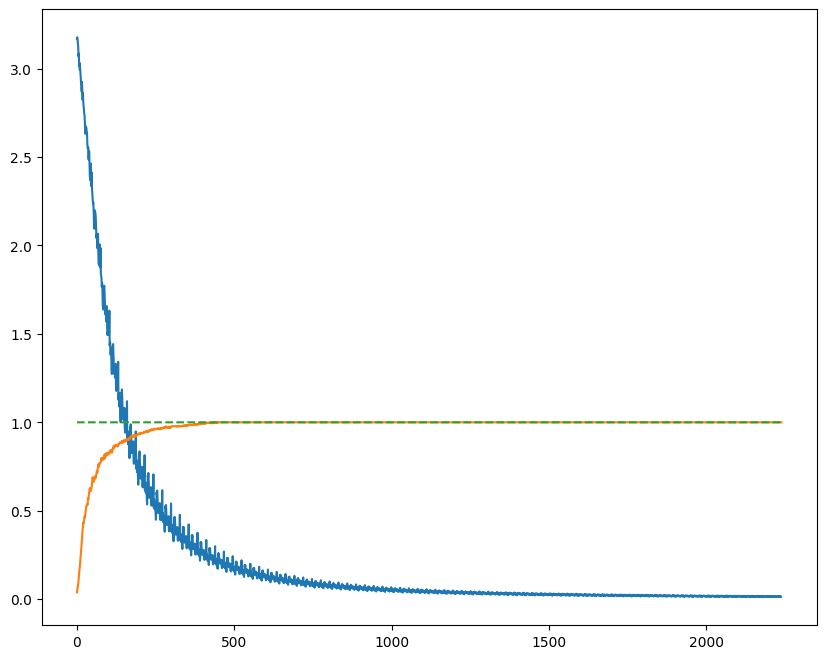

In [49]:
plt.figure(figsize=(10,8))
plt.plot(loss_log[2:])
plt.plot(acc_log)
plt.plot(np.ones(len(acc_log)), linestyle='dashed')
plt.show()

In [50]:
predictions = model(Variable(test_x))
accuracy, correct, total = model.test(torch.max(predictions.data, 1)[1], test_y)

OutOfMemoryError: CUDA out of memory. Tried to allocate 4.71 GiB. GPU 

In [ ]:
print("Accuracy = " + str(accuracy) + " ("+str(correct)+"/"+str(total)+")")

Accuracy = 0.995556364960845 (27333/27455)


In [ ]:
torch.save(model, 'AITP_beta.pt')